Feature Extraction Using Autoencoders and then K Means Clustering

Epoch 1/50
1/1 [==============================] - 0s 308ms/step - loss: 0.6971
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6925
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6896
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6872
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6846
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6813
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6772
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6726
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6675
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6621
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6563
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6504
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 

c:\Users\Shreeja Deshpande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


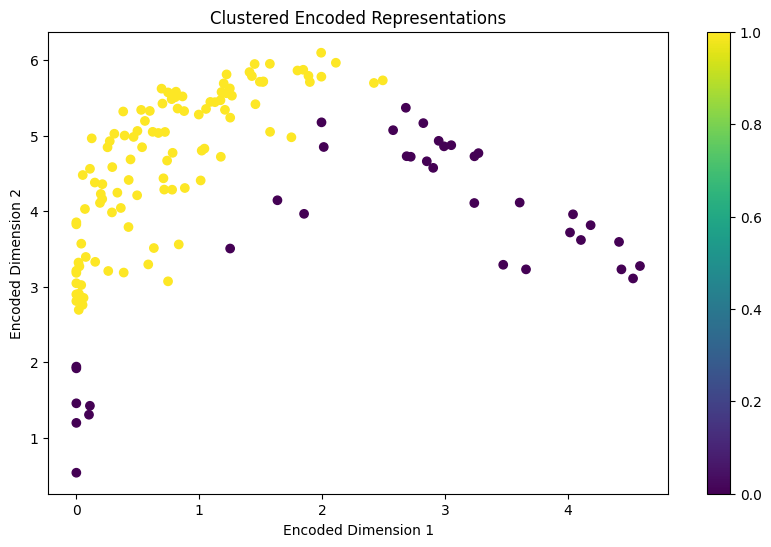

In [1]:
import os
import cv2  # or use PIL for image loading
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load images from a folder
image_folder = "./Image_gen_collection/Image_gen_collection/"
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]
images = []
for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    image = cv2.resize(image, (28, 28))  
    images.append(image)


images = np.array(images, dtype=np.float32) / 255.0

# Flatten the images
num_images, height, width = images.shape
images = images.reshape(num_images, height * width)

input_dim = height * width
encoding_dim = 32

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(images, images,
                epochs=50,
                batch_size=256,
                shuffle=True)

# Use the trained autoencoder to obtain encoded representations of the data
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(images)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(encoded_imgs)
cluster_labels = kmeans.labels_

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('Clustered Encoded Representations')
plt.colorbar()
plt.show()

In [2]:
# Predict cluster labels for new images
new_image_path = "./Image_gen_collection/Image_gen_collection/Comb107_0_rep_15001_cell_types.png"
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (28, 28))
new_image = np.array(new_image, dtype=np.float32) / 255.0
new_image = new_image.reshape(1, height * width)
encoded_new_image = encoder.predict(new_image)
predicted_cluster = kmeans.predict(encoded_new_image)
print("Predicted cluster label for the new image:", predicted_cluster[0])

1/1 [==============================] - 0s 15ms/step
Predicted cluster label for the new image: 1


Feature Extraction Using CNN and then K Means Clustering

5/5 [==============================] - 0s 5ms/step


c:\Users\Shreeja Deshpande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


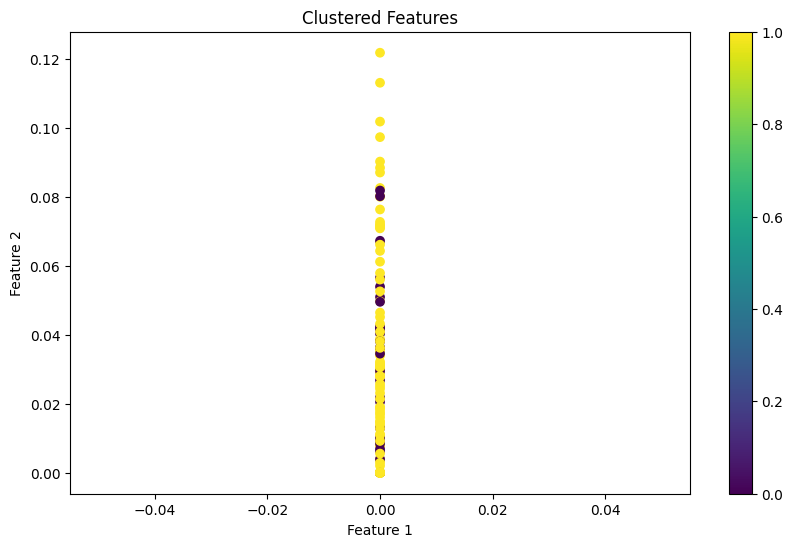

In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

image_folder = "./Image_gen_collection/Image_gen_collection"
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]
images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image = cv2.resize(image, (32, 32))  
    images.append(image)

images = np.array(images, dtype=np.float32) / 255.0

# Define CNN architecture
input_shape = images.shape[1:]
input_img = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)
encoded = Dense(128, activation='relu')(flatten)

# Create CNN model
encoder = Model(input_img, encoded)

# Extract features from the images using the trained encoder
encoded_imgs = encoder.predict(images)

# Apply KMeans clustering for unsupervised classification
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(encoded_imgs)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Features')
plt.colorbar()
plt.show()